<a href="https://colab.research.google.com/github/vinnyhbr/Atoba/blob/main/Atob%C3%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

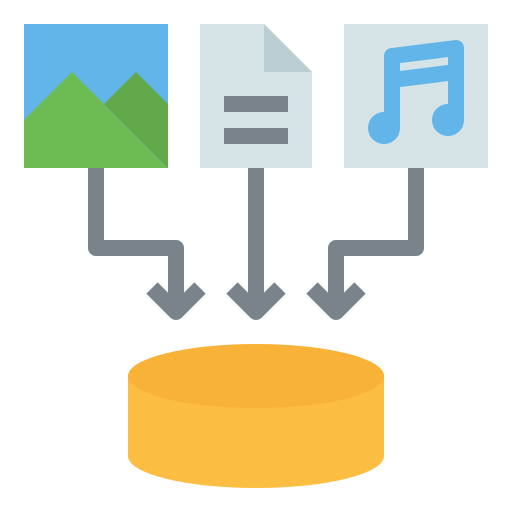

#Desenvolvimento do Conjunto de Dados
- Captura de Imagens de Satélite:

**1.Sensores de Satélite:** Imagens são capturadas por sensores a bordo dos satélites, que detectam reflexões de luz e outras radiações eletromagnéticas da superfície terrestre e marinha.

**2.Resolução das Imagens:** Dependendo do satélite, a resolução pode variar, mas geralmente é de alta definição para capturar detalhes finos.

Divisão das Imagens:

**3.Dimensionamento de Patches:** Imagens grandes são divididas em patches menores (exemplo: 100x100 pixels) para facilitar o processamento e a análise.

Cálculo de Patches:

#  Divisão das Imagens
**Cálculo Realizado:**
Dimensionamento de Patches:
As imagens de satélite são divididas em menores chamadas patches .

Suponha que uma imagem de satélite tenha uma resolução de 4000 x 4000 pixels.

patches de (4000/100 = 40).Se quisermos dividir essa imagem em patches de 100 x 100 pixels, a imagem será dividida em 40 x 40 patches (4000/100 = 40).

In [ ]:
# Essa operação cria uma série de pequenos quadrados, permitindo que cada patch seja aplicado separadamente.
image_height = 4000
image_width = 4000
patch_size = 100

num_patches_vertical = image_height // patch_size
num_patches_horizontal = image_width // patch_size
# Isso resultará em patches 40x40 para uma imagem de 4000x4000 pixels.
# Dividir imagens de satélite em patches menores ajuda a tornar a análise mais precisa e gerenciável.
# Fazendo isso, cada patch se torna um vetor de dados que pode ser analisado individualmente para detectar
# padrões e anomalias. Em resumo, trabalhar com patches facilita a detecção de
# pequenos detalhes e torna a análise de grandes imagens mais eficiente.

# Processamento de Imagens
**Cálculo Realizado:**
- Correção Radiométrica:

1. Ajusta os valores de brilho e contraste da imagem.

2. Fórmula:Imagem_corrigida = (Imagem_original - Min) / (Max - Min)

In [ ]:
def corregir_radiometrica(imagem):
    min_val = imagem.min()
    max_val = imagem.max()
    imagem_corrigida = (imagem - min_val) / (max_val - min_val)
    return imagem_corrigida

- Correção Geométrica:

Alinhamento das Imagens: Usando transformações geométricas para alinhar corretamente a imagem à superfície terrestre. Usando transformações geométricas para alinhar corretamente a imagem à superfície terrestre.



In [ ]:
from skimage.transform import warp
def corregir_geometrica(imagem, coordenadas):
    imagem_corrigida = warp(imagem, coordenadas)
    return imagem_corrigida


-  Realidade das Imagens:

1. Melhore a qualidade da imagem para destacar características importantes.

2. Você pode usar filtros como o filtro de Sobel para detecção de bordas.

Filtro de Sobel para Detecção de Bordas: Realça as bordas e características importantes. Realça as bordas e características importantes.

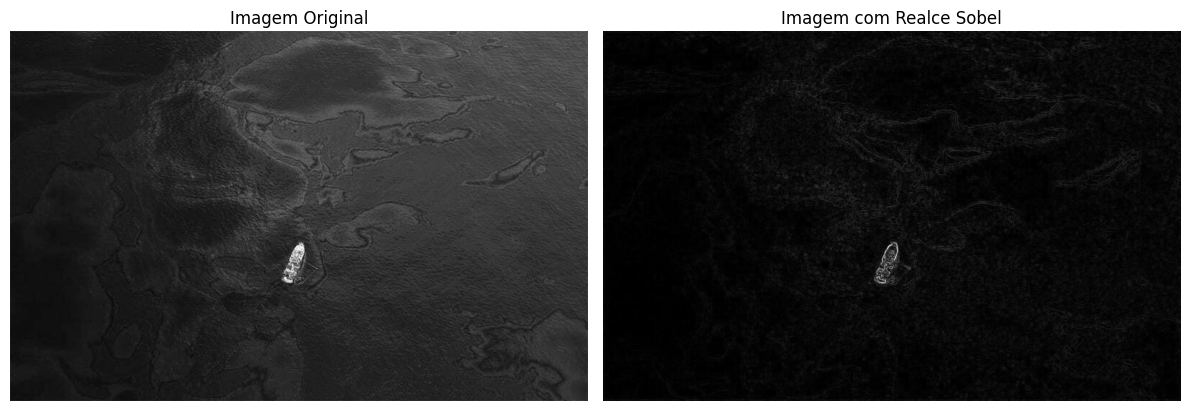

In [ ]:
from skimage import io, color
from skimage.filters import sobel
import matplotlib.pyplot as plt

# Carregar e Processar a Imagem
imagem = io.imread('/content/Manchas-de-oleo-.jpg')
imagem_cinza = color.rgb2gray(imagem)
imagem_realce = sobel(imagem_cinza)

# Exibir as Imagens
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax = axes.ravel()

ax[0].imshow(imagem_cinza, cmap=plt.cm.gray)
ax[0].set_title('Imagem Original')

ax[1].imshow(imagem_realce, cmap=plt.cm.gray)
ax[1].set_title('Imagem com Realce Sobel')

for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()


#3. Extração de Recursos
**Cálculo Realizado:**
- Características de Textura:

1. Características como contraste, brilho, energia e homogeneidade podem ser extraídas.

2. Por exemplo, utilizando a matriz de coocorrência de níveis de cinza (GLCM):

Matriz de Coocorrência de Níveis de Cinza (GLCM): e homogeneidade. Calcula características como contraste, brilho, energia e homogeneidade.

In [ ]:
from skimage.feature import graycomatrix, graycoprops

def extrair_caracteristicas_textura(imagem):
    glcm = greycomatrix(imagem, distances=[1], angles=[0], symmetric=True, normed=True)
    contraste = greycoprops(glcm, 'contrast')[0, 0]
    correlacao = greycoprops(glcm, 'correlation')[0, 0]
    energia = greycoprops(glcm, 'energy')[0, 0]
    homogeneidade = greycoprops(glcm, 'homogeneity')[0, 0]
    return [contraste, correlacao, energia, homogeneidade]

- Características de Cor:

1. Médias e desvios padrão das intensidades das cores (por exemplo, em RGB ou outros espaços de cores).

In [ ]:
def extrair_caracteristicas_cor(imagem):
    media = np.mean(imagem, axis=(0, 1))
    desvio_padrao = np.std(imagem, axis=(0, 1))
    return np.concatenate([media, desvio_padrao])

# **Esses** cálculos transformam a imagem em vetores de recursos que descrevem quantitativamente o conteúdo visual, permitindo a construção de modelos de aprendizado de máquina para classificação.

# **Processo Completo**
#As imagens de satélite são capturadas, divididas em manchas menores, e processadas para correção de brilho, contraste e geometria. Técnicas de realce, como o filtro Sobel, são aplicadas para destacar características importantes. Finalmente, recursos de textura e cor são extraídos para criar vetores que representam quantitativamente o conteúdo de cada patch, permitindo a classificação de vazamentos de óleo.

================================================================================

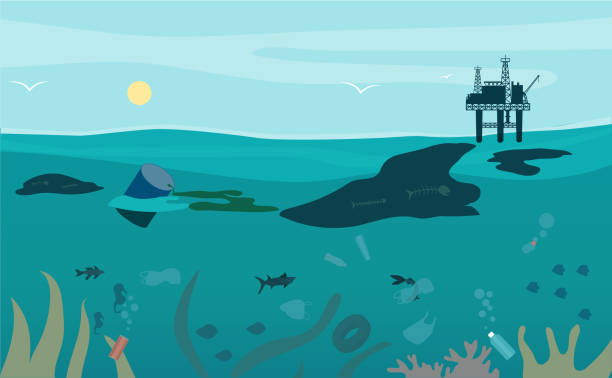

# 🛢🌊Oil Spill Classification

# **Aqui vamos treinar e analisar os resultados de 4 modelos**

# Importação de Bibliotecas

In [ ]:
9# Pandas: manipulação de dados.
# Scikit-learn: Modelagem treinamento e avaliação de modelos
# Matplotlib e Numpy: Visualização de dados e operações numéricas.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Carregar Dados

In [ ]:
# Carregar os dados salvos no drive.
# Carregamento do CSV: Os dados são carregados em um DataFrame do Pandas.
data = pd.read_csv('/content/oil_spill.csv')
data.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,target
0,1,2558,1506.09,456.63,90,6395000,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


In [ ]:
# Mostrar as dimensões do DataFrame
print(f'Dimensões do DataFrame: {data.shape}')

# Pegar os valores separados
num_rows, num_columns = data.shape

print(f'Número de linhas: {num_rows}')
print(f'Número de colunas: {num_columns}')

Dimensões do DataFrame: (937, 50)
Número de linhas: 937
Número de colunas: 50


# Separar as Variáveis Independentes (X) e Dependentes (y)

In [ ]:
# Variáveis ​​Independentes (X): Todas as colunas, exceto a última.
# A última coluna, que contém o alvo 'target'.
X = data.iloc[:, :-1]
y = data['target']


# Normalizar e Padronizar os Dados para Garantir Consistência

In [ ]:
# StandardScaler: Normaliza as variáveis ​​independentes para que todas estejam na mesma escala (média 0 e desvio padrão 1).
# Criar uma instância de StandardScaler
scaler = StandardScaler()

# Ajustar e transformar os dados
# Ajustar e transformar os dados
X_normalized = scaler.fit_transform(X)

# Converter de volta para um DataFrame com os nomes das colunas originais
X = pd.DataFrame(data=X_normalized, columns=X.columns)

# Verifique os dados normalizados
X.head()

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,...,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49
0,-1.240922,1.152390,1.346434,-0.793007,0.129657,1.469091,-0.185871,-0.345107,3.165389,-0.343460,...,0.611105,1.913877,0.800597,0.950757,0.216514,-0.255448,-0.383248,3.686767,0.388730,-0.058377
1,-1.225524,11.389546,-1.033273,-0.057342,2.114766,14.374844,0.618905,-2.207407,7.100184,-2.226754,...,0.611105,4.810555,15.485710,17.486286,11.381341,-0.878152,-0.383248,6.362181,0.387769,-0.639664
2,-1.210126,-0.112818,1.252645,-0.502492,0.085544,-0.125929,-0.222058,-0.498440,-0.073589,-0.454242,...,0.611105,0.465538,-0.248340,-0.197438,-0.449905,0.858654,2.609278,3.460466,0.395456,-0.096212
3,-1.194727,0.449611,1.440556,-1.101091,-0.399705,0.583114,-0.066295,-0.322804,1.725979,-0.343460,...,0.611105,5.101741,0.467147,0.370349,0.286675,1.654442,2.609278,4.336762,0.382004,-0.017102
4,-1.179329,-0.010794,0.419520,-0.823188,-1.039352,0.002691,-0.142604,-0.584864,-0.072364,-0.565024,...,0.611105,0.385669,0.395889,0.481449,0.022483,-0.484237,-0.383248,3.072971,0.381043,-0.264751


## Número de imagens com manchas de óleo no conjunto de dados

In [ ]:
# Contar quantas imagens têm manchas de óleo
count_oil_spill = data['target'].value_counts()[1]  # Supondo que 1 indica vazamento de óleo

print(f'Número de imagens com manchas de óleo: {count_oil_spill}')

# Contar quantas imagens não têm manchas de óleo
count_no_oil_spill = data['target'].value_counts()[0]  # Supondo que 0 indica ausência de vazamento de óleo

print(f'Número de imagens sem manchas de óleo: {count_no_oil_spill}')

Número de imagens com manchas de óleo: 41
Número de imagens sem manchas de óleo: 896


# Apresenta esse resultado em um grafico

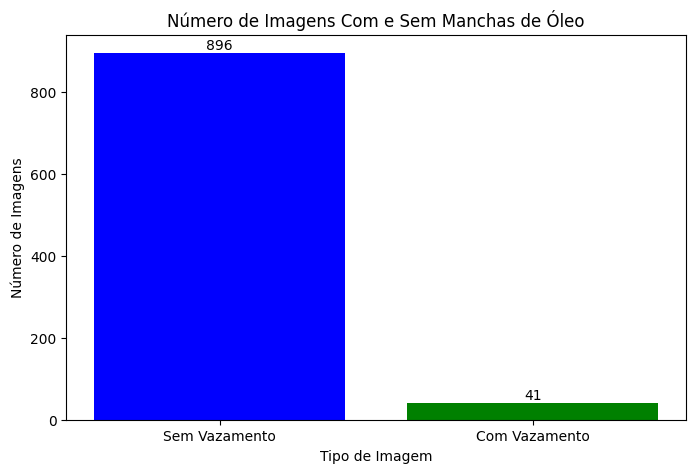

In [ ]:
# Contar o número de imagens com e sem manchas de óleo
count_oil_spill = data['target'].value_counts()

# Criar o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(['Sem Vazamento', 'Com Vazamento'], count_oil_spill, color=['blue', 'green'])

# Adicionar os números sobre as barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, int(yval), ha='center', va='bottom')

plt.title('Número de Imagens Com e Sem Manchas de Óleo')
plt.xlabel('Tipo de Imagem')
plt.ylabel('Número de Imagens')
plt.show()

# Divisão em Conjunto de Treino e Teste

In [ ]:
# Treino/Teste: Os dados dados são divididos em 80% para treino e 20% para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definição dos Modelos


In [ ]:
# Árvore de Decisão: Algoritmo simples e interpretado interpretável.
# Floresta Aleatória: Conjunto de árvores de decisão para melhorar resultados e reduzir overfitting.
# Regressão Logística: Modelo linear para classificação.
# Rede Neural (MLP): Modelo mais complexo com múltiplas camadas.
model_tree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
model_lr = LogisticRegression(solver='saga', max_iter=5000)
model_nn = MLPClassifier(random_state=42, max_iter=5000)
models = [("Árvore de Decisão", model_tree), ("Rede Neural", model_nn), ("Regressão Logistica", model_lr)]

# Treinamento e Avaliação dos Modelos

In [ ]:
# model.fit treinar o modelo com os dados de treino.
# Predição: faz variação no conjunto de teste. model.predict
# Avaliação: e calcula métricas de desempenho. classification_report accuracy_score

results = {}
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=1)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'precision': [report['0']['precision'], report['1']['precision'], report['macro avg']['precision'], report['weighted avg']['precision']],
        'recall': [report['0']['recall'], report['1']['recall'], report['macro avg']['recall'], report['weighted avg']['recall']],
        'f1_score': [report['0']['f1-score'], report['1']['f1-score'], report['macro avg']['f1-score'], report['weighted avg']['f1-score']],
        'accuracy': accuracy
    }
    print(f'Relatório de classificação do {name}:')
    print(classification_report(y_test, y_pred, zero_division=1))
    print('\n')

Relatório de classificação do Árvore de Decisão:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       182
           1       0.62      0.83      0.71         6

    accuracy                           0.98       188
   macro avg       0.81      0.91      0.85       188
weighted avg       0.98      0.98      0.98       188



Relatório de classificação do Rede Neural:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       182
           1       0.45      0.83      0.59         6

    accuracy                           0.96       188
   macro avg       0.72      0.90      0.78       188
weighted avg       0.98      0.96      0.97       188



Relatório de classificação do Regressão Logistica:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       182
           1       0.50      0.50      0.50         6

    accuracy                       

# Acurácia nos Dados de Treino

In [ ]:
# Avaliação no Treino: Calcula acurácia nos dados de treino para verificar mais
for name, model in models:
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    results[name]['train_accuracy'] = train_accuracy
    print(f'--- {name} ---')
    print(f'Test Accuracy: {accuracy:.2f}')
    print(f'Train Accuracy: {train_accuracy:.2f}')
    print('')

--- Árvore de Decisão ---
Test Accuracy: 0.97
Train Accuracy: 0.98

--- Rede Neural ---
Test Accuracy: 0.97
Train Accuracy: 1.00

--- Regressão Logistica ---
Test Accuracy: 0.97
Train Accuracy: 0.97



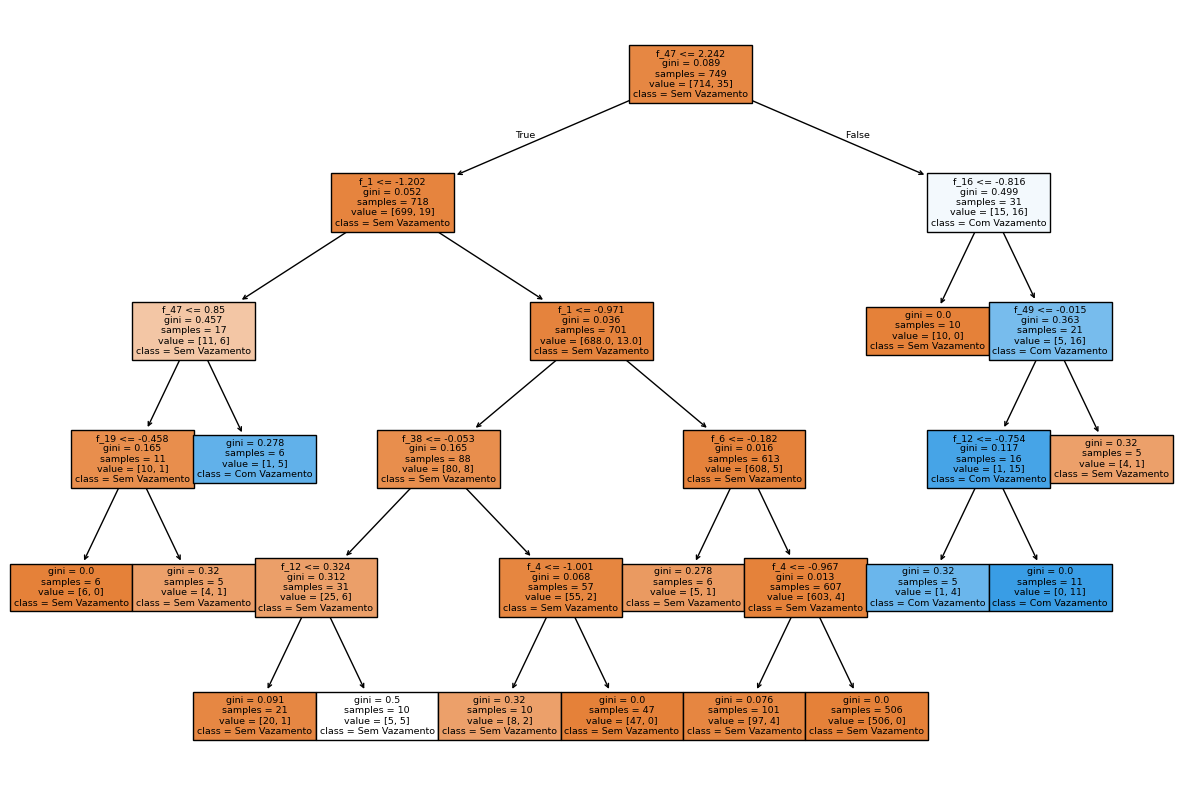

In [ ]:
# Visualizando a arvore
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 10))
plot_tree(model_tree, feature_names=data.columns[:-1], class_names=['Sem Vazamento', 'Com Vazamento'], filled=True, ax=ax)
plt.show()

# Analise sobre o grafico
**A imagem mostra uma árvore de decisão usada para classificar dados em duas classes: "Sem Vazamento" e "Com Vazamento". A árvore de decisão é composta por vários nós, cada um representando uma decisão baseada em uma característica (como f_1, f_47, f_16, etc.) e um valor de limites. Aqui estão alguns pontos importantes sobre a árvore:**

*Características Importantes:*
- f_47 : É o primeiro nó de decisão, dividindo os dados em dois ramos principais com base no valor 2.242. Isso indica que a característica f_47 é mais significativa para a decisão inicial .

- f_1 : Aparece em vários nós, abaixo que é uma característica significativa para a classificação.

- f_16, f_43, f_38 : Outras características que aparecem em diferentes níveis da árvore, contribuindo para a classificação final.

# Função para Criar Gráficos

In [ ]:
# Plot_metrics: Função para criar gráficos das medidas de precisão, recall e f1-score.
def plot_metrics(metrics, title, ylabel):
    labels = ['Class 0', 'Class 1', 'Macro Avg', 'Weighted Avg']
    x = np.arange(len(labels))
    width = 0.2
    fig, ax = plt.subplots(figsize=(12, 6))
    for i, (name, metric) in enumerate(metrics.items()):
        rects = ax.bar(x + i*width, metric, width, label=name)
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(round(height, 2)),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
    ax.set_xlabel('Classes')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(labels)
    ax.legend()
    fig.tight_layout()
    plt.show()

# Criação dos Gráficos

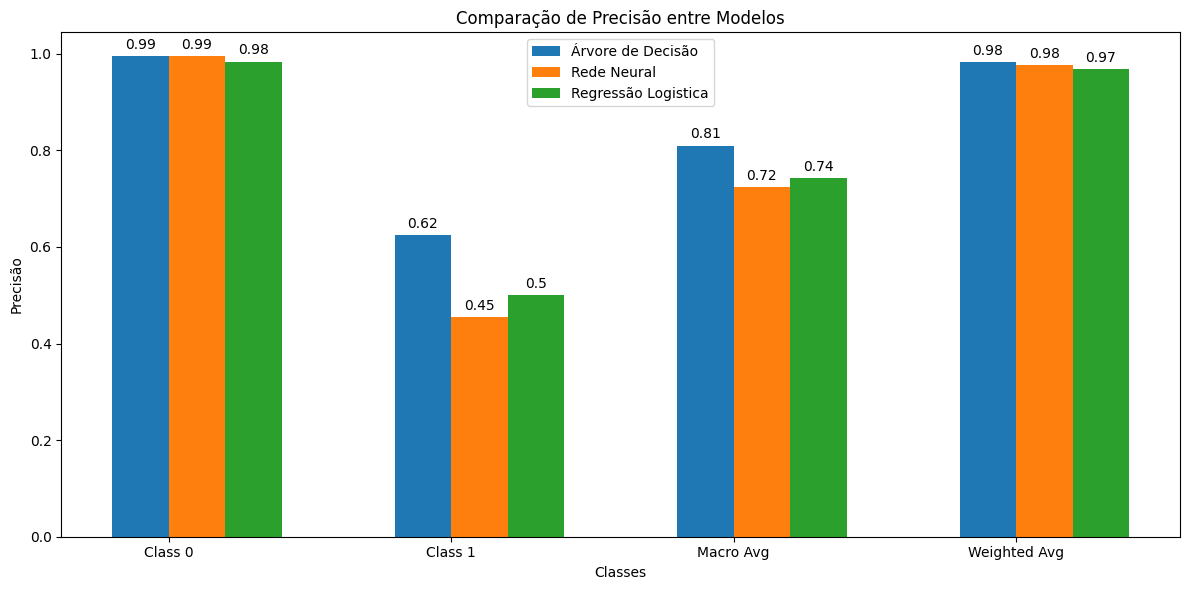

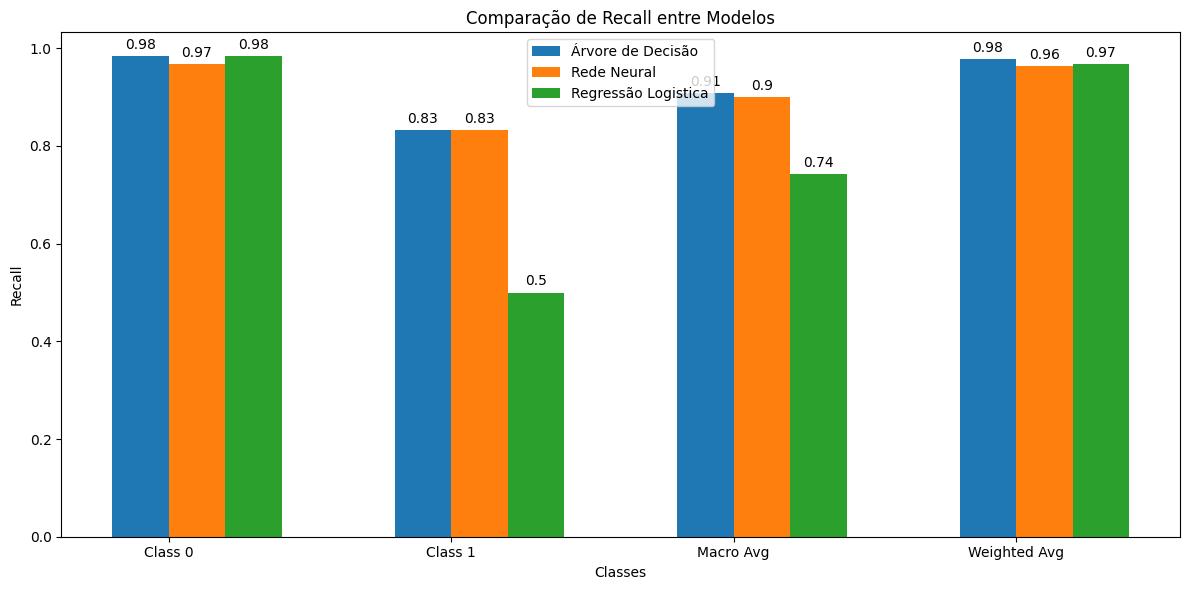

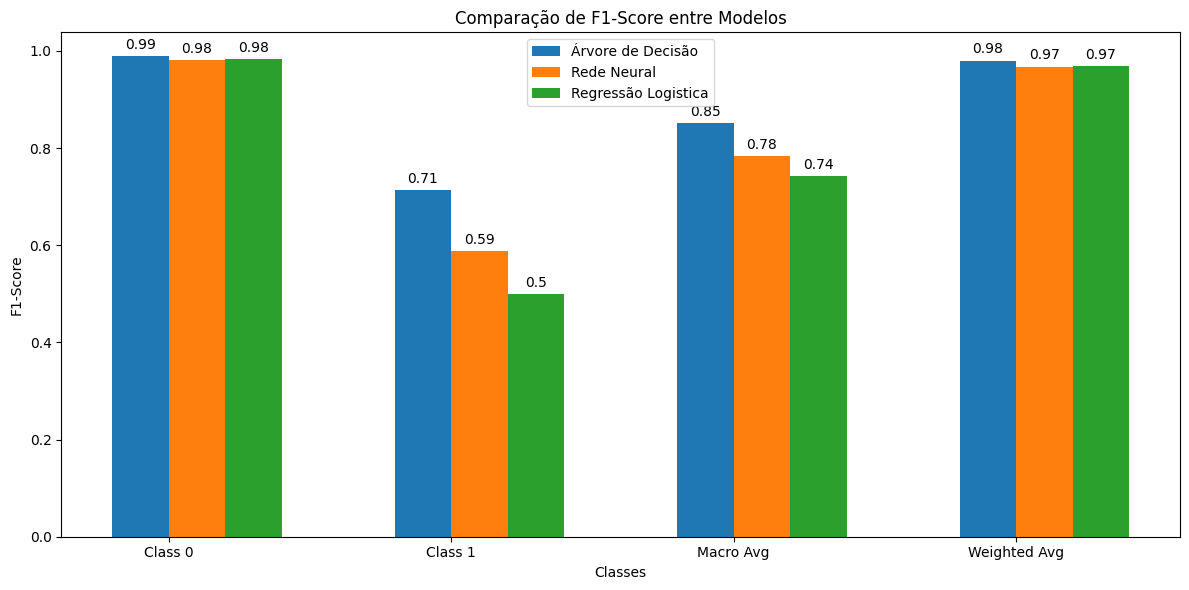

In [ ]:
# Gráficos: Plota gráficos comparando soluções, recall e f1-score entre os modelos.
plot_metrics({name: result['precision'] for name, result in results.items()}, 'Comparação de Precisão entre Modelos', 'Precisão')
plot_metrics({name: result['recall'] for name, result in results.items()}, 'Comparação de Recall entre Modelos', 'Recall')
plot_metrics({name: result['f1_score'] for name, result in results.items()}, 'Comparação de F1-Score entre Modelos', 'F1-Score')

# Gráfico de Acurácia

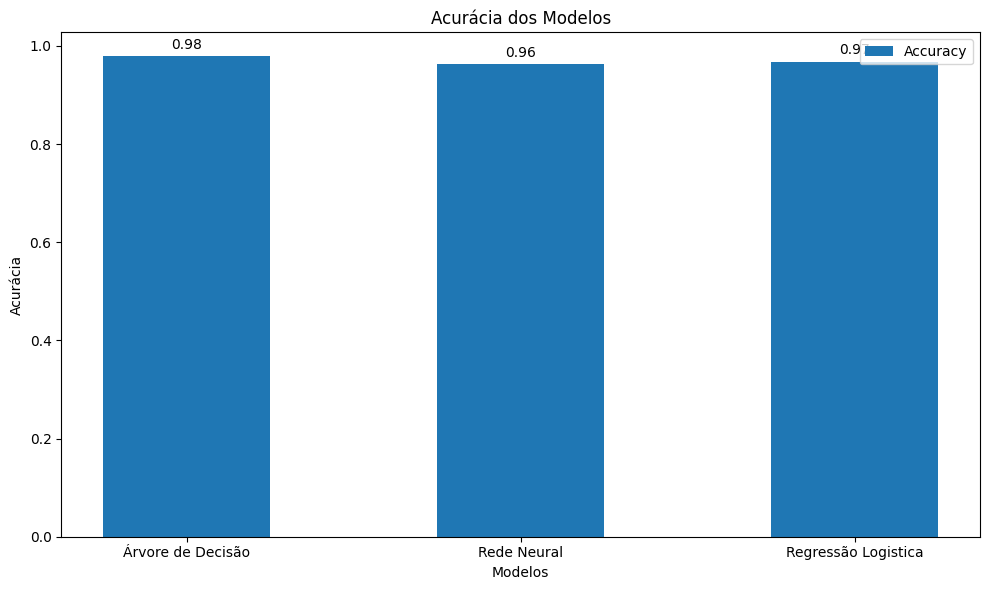

In [ ]:
# Gráfico de Acurácia: Compara a acurácia de diferentes modelos.
accuracy = [result['accuracy'] for result in results.values()]
fig, ax = plt.subplots(figsize=(10, 6))
rects = ax.bar(results.keys(), accuracy, width=0.5, label='Accuracy')
ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia')
ax.set_title('Acurácia dos Modelos')
ax.legend()
for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
fig.tight_layout()
plt.show()

# Gráfico de Acurácia de Treino

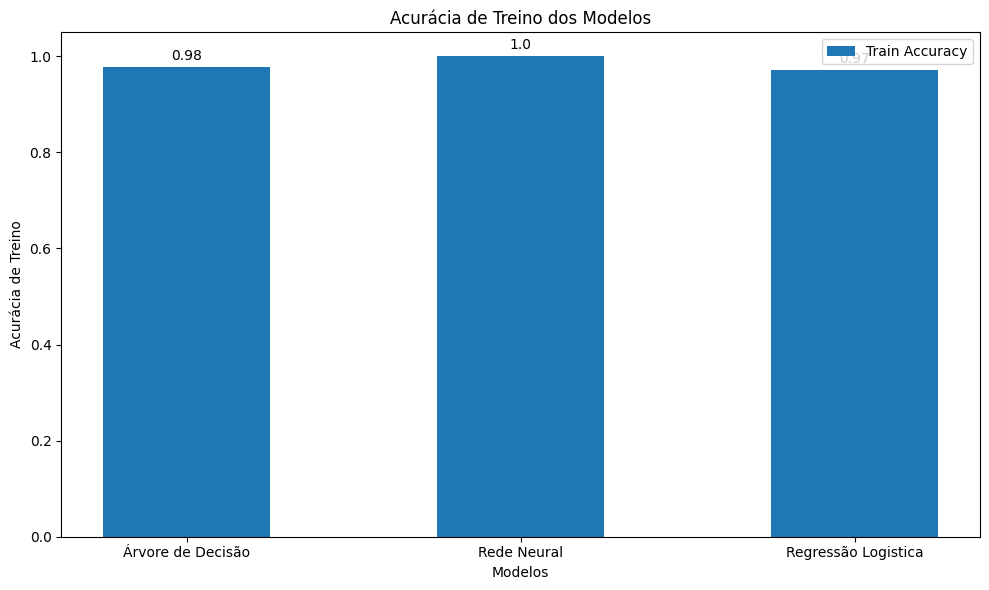

In [ ]:
train_accuracy = [result['train_accuracy'] for result in results.values()]
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.5
rects = ax.bar(results.keys(), train_accuracy, width, label='Train Accuracy')

ax.set_xlabel('Modelos')
ax.set_ylabel('Acurácia de Treino')
ax.set_title('Acurácia de Treino dos Modelos')
ax.legend()

for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(round(height, 2)),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

fig.tight_layout()
plt.show()

# Conclusão:
 - Árvore de Decisão : Tem o melhor desempenho geral, com alta precisão, recall e F1-Score tanto na classe 0 quanto na classe 1. A precisão para a classe 1 (0,62) e o recall (0,83) indica que é confiável para identificar corretamente os vazamentos de óleo, embora ainda tenha algum espaço para melhorar os resultados.

 - Rede Neural : bom apresenta recall para a classe 1 (0.83), mas a precisão (0.45) é baixa, indicando que o modelo tem muitos falsos positivos. A acurácia geral é boa (0,96), mas o desempenho na classe 1 precisa ser melhorado.

- Regressão Logística Tem desempenho: Tem desempenho equilibrado, mas não tão bom quanto a Árvore de Decisão. A precisão e recall para a classe 1 são medianas (0,50), diminuindo um desempenho moderado na detecção de vazamentos de óleo.

**Melhor Modelo:**

***A Árvore de Decisão se comporta melhor com base nesses resultados. Ela consegue equilíbrio se comportou melhor com base nesses resultados. Ela consegue equilibrar bem as precisão e recall, resultando em um F1-Score robusto para ambas as classes. ***



---

